### Ce notebook contient les exercices du cours ["Introduction à l'apprentissage supervisé"](http://cedric.cnam.fr/vertigo/Cours/ml2/preambule.html) proposé par le CNAM.

# Classement/Discrimination

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# définir les matrices de rotation et de dilatation
rot = np.array([[0.94, -0.34],[0.34, 0.94]]) # rotation
sca = np.array([[3.4, 0],[0, 2]])            # dilatation

# générer données classe 1
np.random.seed(150)
c1d = (np.random.randn(100,2)).dot(sca).dot(rot)

# générer données classe 2
c2d1 = np.random.randn(25,2) + [-10, 2]
c2d2 = np.random.randn(25,2) + [-7, -2]
c2d3 = np.random.randn(25,2) + [-2, -6]
c2d4 = np.random.randn(25,2) + [5, -7]

data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))

# générer étiquettes de classe
l1c = np.ones(100, dtype=int)
l2c = np.zeros(100, dtype=int)
labels = np.concatenate((l1c, l2c))

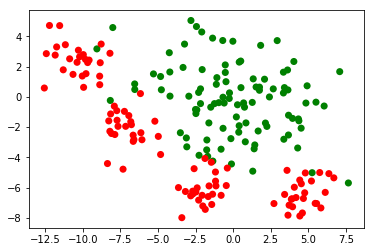

In [2]:
# Visualisation de toutes les données
cmp = np.array(['r','g'])
plt.scatter(data[:,0],data[:,1],c=cmp[labels],s=50,edgecolors='none')
plt.show()

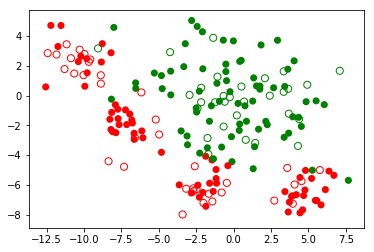

In [3]:
# Découpage données d'apprentissage/données de test
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data, labels, test_size=0.33)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[Y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[Y_test1])
plt.show()

## Discrimination linéaire

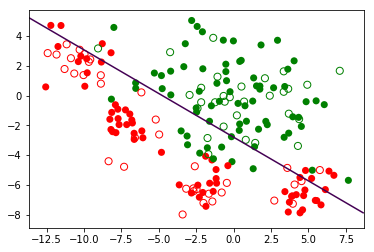

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Evaluation et affiche sur split1
lda.fit(X_train1, Y_train1)
lda.score(X_train1, Y_train1)
lda.score(X_test1, Y_test1)

# Graph
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[Y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[Y_test1])
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max= plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5])
plt.show()

In [5]:
# Autres découpages App/Test
for decoupage in range(10):
    X_trainv, X_testv, Y_trainv, Y_testv = train_test_split(data, labels, test_size=0.33)
    ldav = LinearDiscriminantAnalysis()
    ldav.fit(X_trainv, Y_trainv)
    ldav.score(X_testv, Y_testv)

## Discrimination par PMC

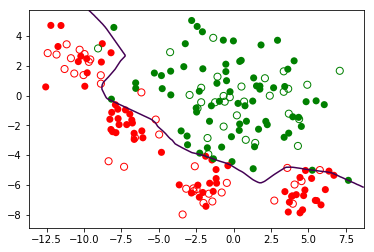

In [6]:
# Discrimination par PMC (alpha = 1e-5)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5) #Alpha = weight decay / coefficiant d'oubli

# Evaluation et affichage sur split1
clf.fit(X_train1, Y_train1)
clf.score(X_train1, Y_train1)

clf.score(X_test1, Y_test1)

plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[Y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[Y_test1])
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5])
plt.show()

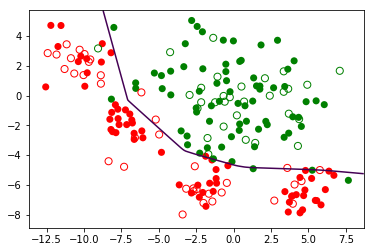

In [7]:
# Discrimination par PMC (alpha = 1)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1) #Alpha = weight decay / coefficiant d'oubli

# Evaluation et affichage sur split1
clf.fit(X_train1, Y_train1)
clf.score(X_train1, Y_train1)

clf.score(X_test1, Y_test1)

plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[Y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[Y_test1])
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5])
plt.show()

# Régression

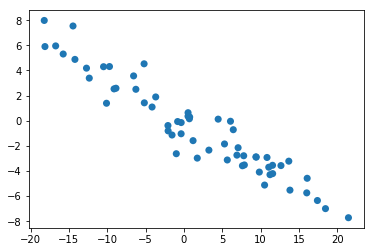

In [8]:
# définir les matrices de rotation et de dilatation
rot = np.array([[0.94, -0.34],[0.34, 0.94]])
sca = np.array([[10, 0],[0, 1]])

# générer données classe 1
np.random.seed(60)
rd = np.random.randn(60,2)
datar = rd.dot(sca).dot(rot)

# Visualisation des données
plt.scatter(datar[:,0],datar[:,1],s=50,edgecolors='none')
plt.show()

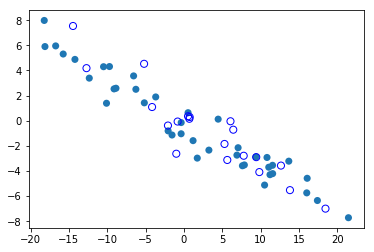

In [9]:
# Découpage App/Test
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(datar[:,0], datar[:,1], test_size=0.33)
plt.scatter(X_train1,Y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,Y_test1,c='none',s=50,edgecolors='blue')
plt.show()

## Régression linéaire

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


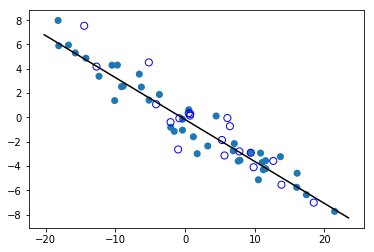

In [10]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# évaluation et affichage sur split1
reg.fit(X_train1.reshape(-1,1), Y_train1)
# attention, pas erreur mais coeff. détermination !
reg.score(X_train1.reshape(-1,1), Y_train1)

reg.score(X_test1.reshape(-1,1), Y_test1)

plt.scatter(X_train1,Y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,Y_test1,c='none',s=50,edgecolors='blue')
nx = 100
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,reg.predict(xx.reshape(-1,1)),color='black')
plt.show()

In [11]:
# Calcul de l'erreur quadratique
from scipy import linalg
linalg.norm(reg.predict(X_train1.reshape(-1, 1)) - Y_train1)
linalg.norm(reg.predict(X_test1.reshape(-1, 1)) - Y_test1)

6.0613184570181

## Régression par PMC

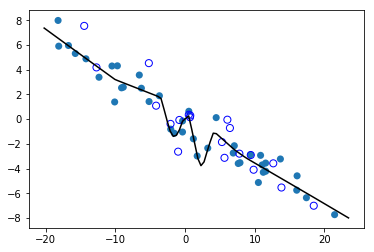

In [12]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5)

# évaluation et affichage sur split1
clf.fit(X_train1.reshape(-1,1), Y_train1)
clf.score(X_train1.reshape(-1,1), Y_train1)

clf.score(X_test1.reshape(-1,1), Y_test1)

plt.scatter(X_train1,Y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,Y_test1,c='none',s=50,edgecolors='blue')
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')
plt.show()

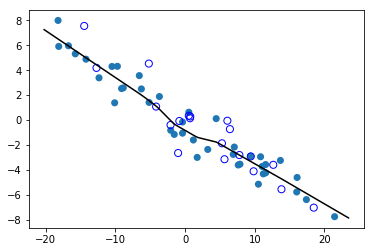

In [13]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1)

# évaluation et affichage sur split1
clf.fit(X_train1.reshape(-1,1), Y_train1)
clf.score(X_train1.reshape(-1,1), Y_train1)

clf.score(X_test1.reshape(-1,1), Y_test1)

plt.scatter(X_train1,Y_train1,s=50,edgecolors='none')
plt.scatter(X_test1,Y_test1,c='none',s=50,edgecolors='blue')
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, nx)
plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')
plt.show()